# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("-----------------------------")  
print("Beginning Data Retrieval")
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

metrics = []

# Construct a for loop
for city in cities:
    
    try: 
    
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        ### Insert a print log of each city as it's being processed with the city number and city name.
        #print(f"Processing Record {city.index} of Set 1 | severo-kurilsk
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        metrics.append({"temperature": temperature,
                       "humidity": humidity,
                       "cloudiness": cloudiness,
                       "wind_speed": wind_speed,
                       "latitude": latitude,
                       "longitude": longitude})
        
    
    except: 
        print('no cities')
        

-----------------------------
Beginning Data Retrieval
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities
no cities


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df = pd.DataFrame(metrics)
cities_df.to_csv('cities_df.csv', index=False)

In [8]:
cities_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,5.00,77,100,7.00,53.02,39.17
1,9.15,81,90,5.10,39.36,-74.42
2,-24.15,69,40,1.00,63.75,-68.51
3,10.80,87,99,3.60,-53.15,-70.92
4,20.00,64,14,5.70,-32.25,148.62
...,...,...,...,...,...,...
537,2.68,44,90,5.70,41.87,-103.67
538,12.02,89,57,0.44,29.04,114.56
539,21.00,35,40,4.10,34.04,-5.00
540,23.95,88,40,2.10,-6.34,106.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

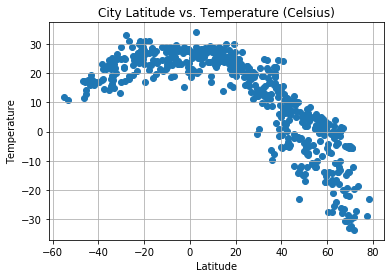

<Figure size 432x288 with 0 Axes>

In [9]:
latitude = cities_df['latitude']
temperature = cities_df['temperature']
plt.scatter(latitude, temperature)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs. Temperature (Celsius)")
plt.grid()
plt.show()
plt.savefig("Images/lat_v_temp.png")

#### Latitude vs. Humidity Plot

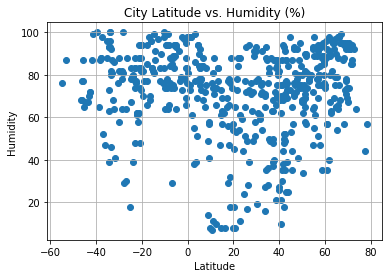

<Figure size 432x288 with 0 Axes>

In [10]:
latitude = cities_df['latitude']
humidity = cities_df['humidity']
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_hum.png")

#### Latitude vs. Cloudiness Plot

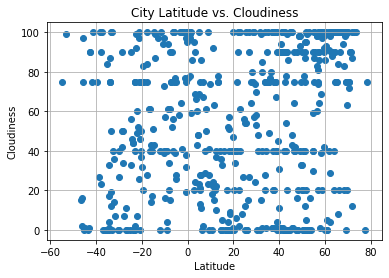

<Figure size 432x288 with 0 Axes>

In [11]:
latitude = cities_df['latitude']
cloudiness = cities_df['cloudiness']
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_cloudy.png")

#### Latitude vs. Wind Speed Plot

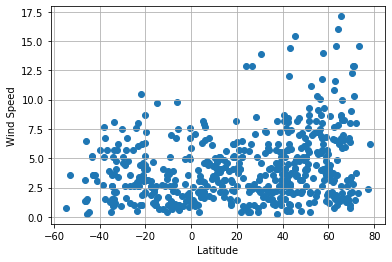

<Figure size 432x288 with 0 Axes>

In [12]:
latitude = cities_df['latitude']
wind_speed = cities_df['wind_speed']
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_wind_speed.png")

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    plt.savefig("Images/")

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df['latitude']>=0]
southern_df = cities_df.loc[cities_df['latitude']<0]

In [15]:
northern_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,5.00,77,100,7.00,53.02,39.17
1,9.15,81,90,5.10,39.36,-74.42
2,-24.15,69,40,1.00,63.75,-68.51
7,7.21,77,78,0.53,43.06,44.74
9,-17.37,95,100,1.34,58.96,126.29
...,...,...,...,...,...,...
536,-5.68,92,90,12.90,70.86,29.09
537,2.68,44,90,5.70,41.87,-103.67
538,12.02,89,57,0.44,29.04,114.56
539,21.00,35,40,4.10,34.04,-5.00


In [16]:
southern_df

,temperature,humidity,cloudiness,wind_speed,latitude,longitude
3,10.80,87,99,3.60,-53.15,-70.92
4,20.00,64,14,5.70,-32.25,148.62
5,14.72,98,100,1.50,-37.62,-73.65
6,23.20,78,0,1.34,-8.93,125.41
8,17.69,46,19,8.07,-33.65,115.33
...,...,...,...,...,...,...
514,22.86,83,56,1.00,-24.79,-65.41
518,24.50,79,46,7.58,-24.32,-47.00
529,28.39,68,40,2.32,-16.37,-58.40
532,20.87,90,100,2.62,-11.55,20.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8671643358109481


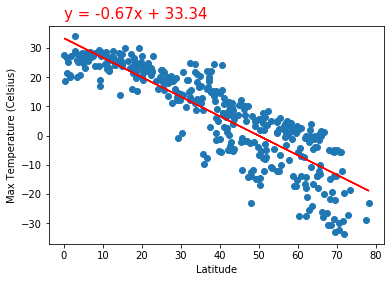

<Figure size 432x288 with 0 Axes>

In [17]:
n_max_temp = northern_df['temperature']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/ntemp_v_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5770169419578962


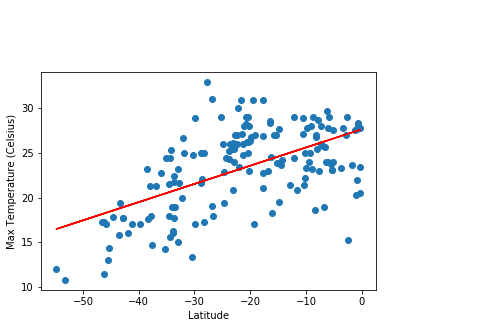

<Figure size 432x288 with 0 Axes>

In [18]:
s_max_temp = southern_df['temperature']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/stemp_v_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.25541014967515285


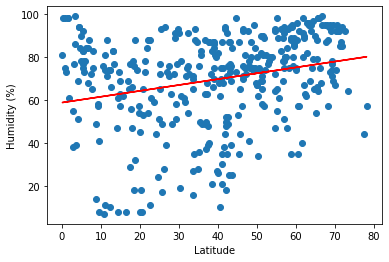

<Figure size 432x288 with 0 Axes>

In [19]:
n_humidity = northern_df['humidity']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1620264201103007


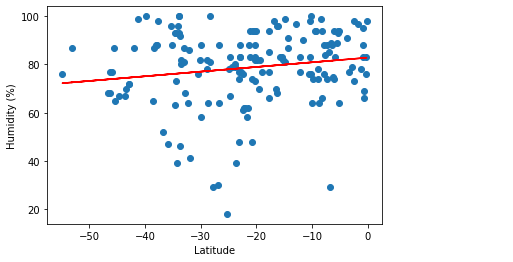

<Figure size 432x288 with 0 Axes>

In [20]:
s_humidity = southern_df['humidity']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/shum_v_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.28065618636977807


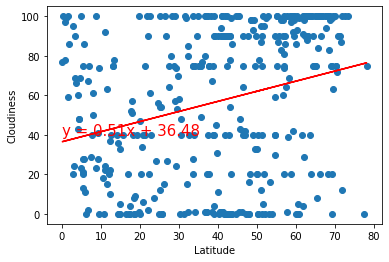

<Figure size 432x288 with 0 Axes>

In [21]:
n_cloudiness = northern_df['cloudiness']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2211057236264081


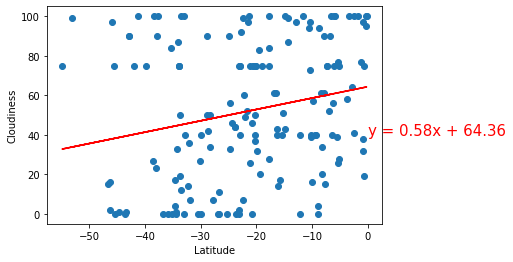

<Figure size 432x288 with 0 Axes>

In [22]:
s_cloudiness = southern_df['cloudiness']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.24703601619022786


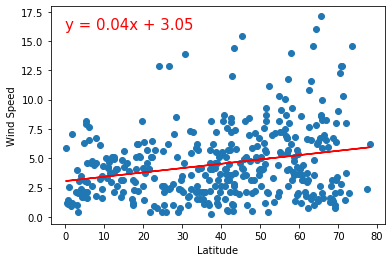

<Figure size 432x288 with 0 Axes>

In [23]:
n_wind_speed = northern_df['wind_speed']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_wind_speed, 'Wind Speed', (0,16))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.10594999904034684


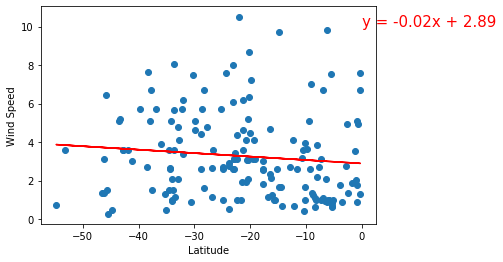

<Figure size 432x288 with 0 Axes>

In [24]:
s_wind_speed = southern_df['wind_speed']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_wind_speed, 'Wind Speed', (0,10))
plt.savefig("Images/nhum_v_lat.png")